In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

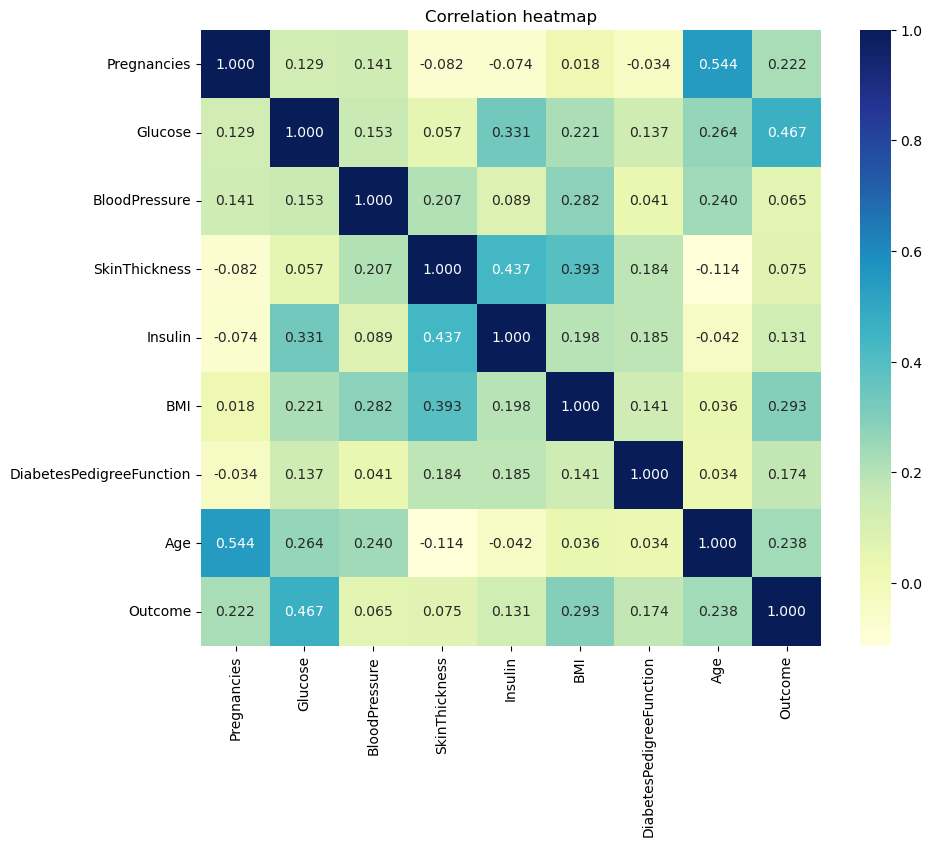

In [7]:
#correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Correlation heatmap")

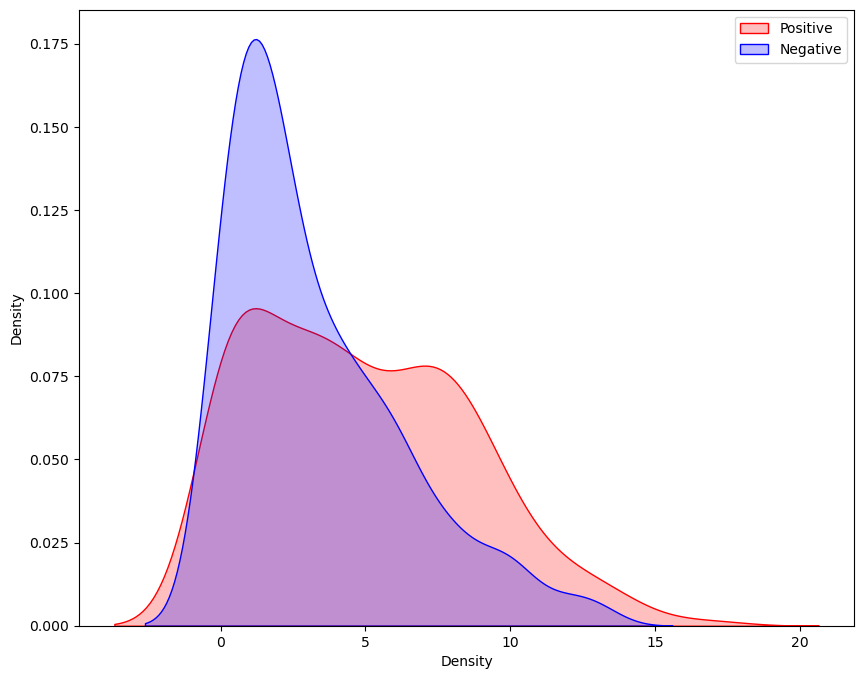

In [14]:
plt.figure(figsize=(10,8))
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color="Red", shade=True)
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color="Blue", shade=True)
kde.set_xlabel("Pregnancies")
kde.set_xlabel("Density")
kde.legend(["Positive", "Negative"])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

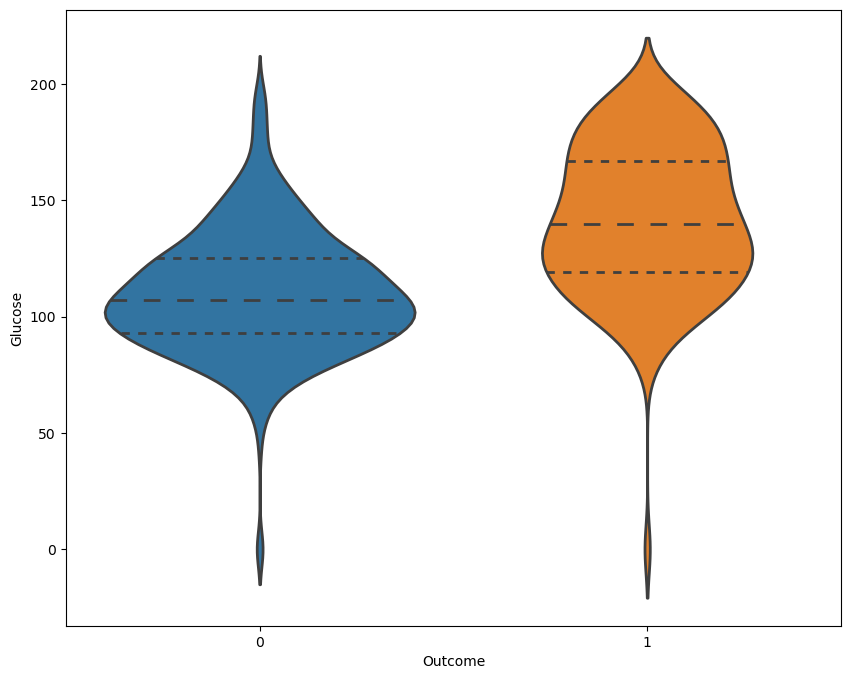

In [10]:
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset, x="Outcome", y="Glucose", split=True, linewidth=2, inner="quart")

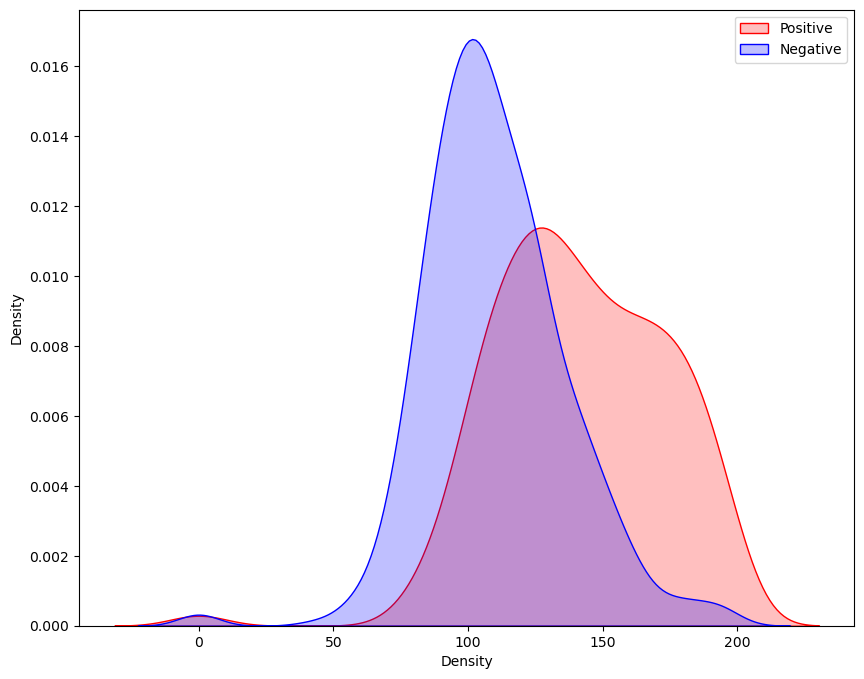

In [13]:
plt.figure(figsize=(10,8))
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color="Red", shade=True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color="Blue", shade=True)
kde.set_xlabel("Glucose")
kde.set_xlabel("Density")
kde.legend(["Positive", "Negative"])

In [15]:
#replace '0' values with mean/median with respective attributes
dataset["Glucose"] = dataset["Glucose"].replace(0, dataset["Glucose"].median())
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0, dataset["BloodPressure"].median())
dataset["BMI"] = dataset["BMI"].replace(0, dataset["BMI"].mean())
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].mean())

In [16]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [18]:
#splitting dependent and independent variables
X = dataset.drop(["Outcome"], axis=1)
y = dataset["Outcome"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [21]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
260,3,191,68,15.000000,130.000000,30.9,0.299,34
151,4,114,65,20.536458,79.799479,21.9,0.432,37
383,1,90,62,18.000000,59.000000,25.1,1.268,25
581,6,109,60,27.000000,79.799479,25.0,0.206,27
300,0,167,72,20.536458,79.799479,32.3,0.839,30
...,...,...,...,...,...,...,...,...
369,1,133,102,28.000000,140.000000,32.8,0.234,45
320,4,129,60,12.000000,231.000000,27.5,0.527,31
527,3,116,74,15.000000,105.000000,26.3,0.107,24
125,1,88,30,42.000000,99.000000,55.0,0.496,26


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

C:\Users\venka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\venka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

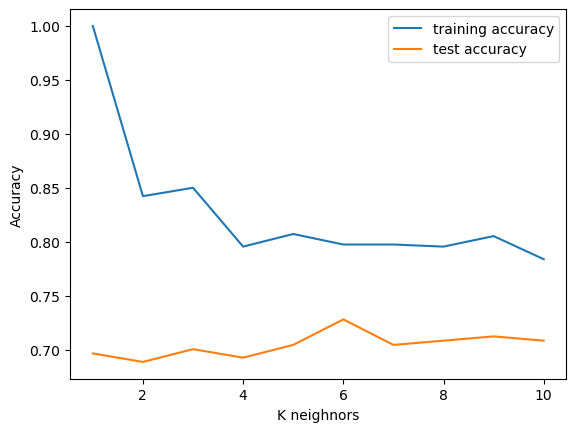

In [28]:
plt.plot(range(1,11), training_accuracy, label = "training accuracy")
plt.plot(range(1,11), test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K neighnors")
plt.legend()

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier(random_state = 10, max_depth=5)
dt.fit(X_train, y_train)
print("Training accuracy: ",dt.score(X_train,y_train))
print("Testing accuracy: ",dt.score(X_test,y_test))

Training accuracy:  0.8463035019455253
Testing accuracy:  0.7283464566929134


# MLP Classifier

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
mlp = MLPClassifier(random_state=5)
mlp.fit(X_train, y_train)
print("Training accuracy: ",mlp.score(X_train,y_train))
print("Testing accuracy: ",mlp.score(X_test,y_test))

Training accuracy:  0.7334630350194552
Testing accuracy:  0.7165354330708661


# Standard scaler

In [36]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [40]:
mlp1 = MLPClassifier(random_state=5)
mlp1.fit(X_scaled, y_train)
print("Training accuracy: ",mlp1.score(X_scaled,y_train))
print("Testing accuracy: ",mlp1.score(X_test_scaled,y_test))

Training accuracy:  0.8385214007782101
Testing accuracy:  0.7362204724409449


C:\Users\venka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
